# 1. Project Objective and Research questions

## 1.1 Objective:

The aim of our paper is to deduce the variables that have the strongest influence to an individual contracting diabetes. 
Understanding which parameters should be taken into account when diagnosing for diabetes by going through each variable through deeper exploratory analysis. I am also looking to find out which machine learning methods would be the most accurate and effective to deduce individuals within the data set having diabetes. We will compare the accuracy, precision and sensitivity of each Machine Learning techniques to decide. 

## 1.2 Resarch question:

What are the main contributors to the likeliness someone were to have diabetes in the data set. What is the relationship between these variables and the deduction an individual has diabetes or not. Finally, to what extent would the pedigree variable, in other words does being genetically susceptible to diabetes be a crucial factor towards the contraction of diabetes.

We will use the findings here to reaffirm current known factors and at the same time possibly deduce new contributors to the onset of diabetes. This will be done with vizualization tools for better understanding and conceptualizing.

# 2. Data Analysis

## 2.1 Data Preparation

We first define the data set and give the needed descriptions for each variable. All candidates were women of ages above 18. Please refer to Figure 1 in read.me file for the descriptions of each variable in the dataset. Since we are deducing the likelihood of an individual being diabetic with respect to the parameters given, the variable ”diabetes” would be the outcome variable.

In [2]:
library(mlbench)
library(dplyr)

data(PimaIndiansDiabetes2)
#PimaIndiansDiabetes2
head(PimaIndiansDiabetes2)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
6,148,72,35,NA,33.6,0.627,50,pos
1,85,66,29,NA,26.6,0.351,31,neg
8,183,64,NA,NA,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,NA,NA,25.6,0.201,30,neg


From the initial glance of the data set there were some instances that have no values given at all which would devalue the accuracy of the algorithms if still used. Therefore I decided to remove all instances where missing values were present to maintain the integrity of this research.

In [6]:
print("After Removal")
dib2 <-PimaIndiansDiabetes2[complete.cases(PimaIndiansDiabetes2),]
dib8=dib2%>%select(glucose:diabetes)
head(dib8)

[1] "After Removal"


,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
4,89,66,23,94,28.1,0.167,21,neg
5,137,40,35,168,43.1,2.288,33,pos
7,78,50,32,88,31.0,0.248,26,pos
9,197,70,45,543,30.5,0.158,53,pos
14,189,60,23,846,30.1,0.398,59,pos
15,166,72,19,175,25.8,0.587,51,pos


## 2.2 Preliminary Exploratory Analysis

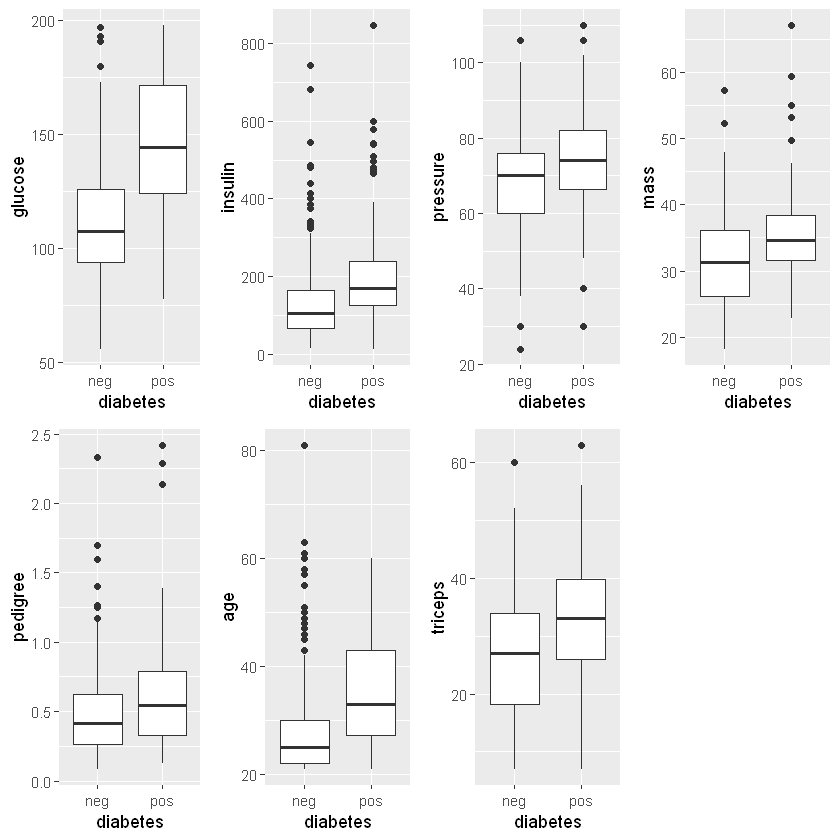

In [13]:
library(ggplot2)
library(gridExtra)
y1=ggplot(dib8,aes(x=diabetes,y=glucose))+geom_boxplot()
y2=ggplot(dib8,aes(x=diabetes,y=insulin))+geom_boxplot()
y3=ggplot(dib8,aes(x=diabetes,y=pressure))+geom_boxplot()
y4=ggplot(dib8,aes(x=diabetes,y=mass))+geom_boxplot()
y5=ggplot(dib8,aes(x=diabetes,y=pedigree))+geom_boxplot()
y6=ggplot(dib8,aes(x=diabetes,y=age))+geom_boxplot()
y7=ggplot(dib8,aes(x=diabetes,y=triceps))+geom_boxplot()
gridExtra::grid.arrange(y1,y2,y3,y4,y5,y6,y7,nrow=2)

Diabetic individuals tend to have higher values in each parameter and there is a noticeable difference between both diabetic and nondiabetic groups. For variables ”glucose” and ”age”, had the most distinct result showing a respectful difference in the data. Letting us assume that glucose and age are strongly influential variables.

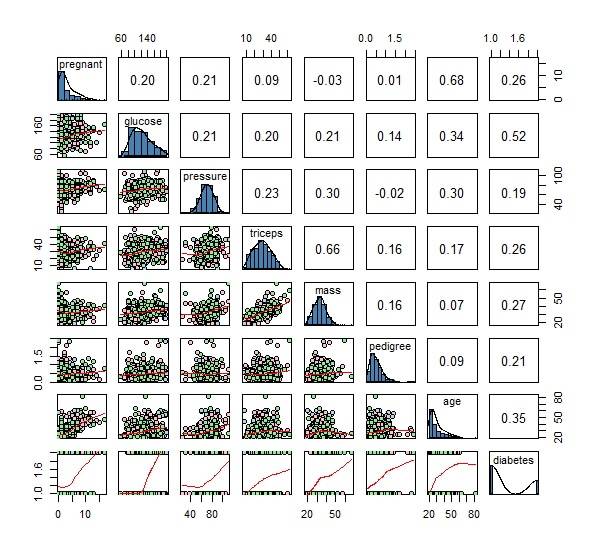

From the scatterplot above, we look at the correlations between variables. Two notable correlations that are deemed significant is between ”age” and ”pregnant” at 0.68 and ”mass” and ”triceps” at 0.66. We take the definition that P>0.80 to be severe multi colinearity (University, n.d.). Since the remainder values don’t even surpasses 0.4, there is no significant case of multi col-linearity arising in the datatset.

From the above analysis, I will only be removing the variable ”pregnant” from the dataset. The remainder variables provides substantial enough distinctiveness to allow our algorithms to accurately classify groups and therefore detect the onset of diabetes in this dataset.


# 3 Machine Learning Techniques

## 3.1 Classification

The subsections below give the descriptions for how I found each of the methods favourable. How I decided to split the data sets is into a 20 percent of data being the test set and 80 percent being the training set which was what we were thought and what I felt would be comfortably used knowing the data size.

In [14]:
#Prepping data for Machine Learning
str(dib8)
dib9 = dib8%>%mutate(diabetes=factor(ifelse(diabetes=="neg", 1,0)))
str(dib9)

#We split the data into a 20% of data being the test set and 80% being the training set
set.seed(100)
training.idx <- sample(1: nrow(dib9), size=nrow(dib9)*0.8)
train.data <-dib9[training.idx, ]
test.data <- dib9[-training.idx, ]


'data.frame':	392 obs. of  8 variables:
 $ glucose : num  89 137 78 197 189 166 118 103 115 126 ...
 $ pressure: num  66 40 50 70 60 72 84 30 70 88 ...
 $ triceps : num  23 35 32 45 23 19 47 38 30 41 ...
 $ insulin : num  94 168 88 543 846 175 230 83 96 235 ...
 $ mass    : num  28.1 43.1 31 30.5 30.1 25.8 45.8 43.3 34.6 39.3 ...
 $ pedigree: num  0.167 2.288 0.248 0.158 0.398 ...
 $ age     : num  21 33 26 53 59 51 31 33 32 27 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 1 2 2 2 2 2 2 1 2 1 ...
'data.frame':	392 obs. of  8 variables:
 $ glucose : num  89 137 78 197 189 166 118 103 115 126 ...
 $ pressure: num  66 40 50 70 60 72 84 30 70 88 ...
 $ triceps : num  23 35 32 45 23 19 47 38 30 41 ...
 $ insulin : num  94 168 88 543 846 175 230 83 96 235 ...
 $ mass    : num  28.1 43.1 31 30.5 30.1 25.8 45.8 43.3 34.6 39.3 ...
 $ pedigree: num  0.167 2.288 0.248 0.158 0.398 ...
 $ age     : num  21 33 26 53 59 51 31 33 32 27 ...
 $ diabetes: Factor w/ 2 levels "0","1": 2 1 1 1 1 1 1 2 1 

### 3.1.1 ML:Classification using logistic regression

The outcome variable which is if an individual has diabetes or not, is in binary and the desired outcome is in fact represented by factor 1. Logistic Regression measures the relationship between a dependent variable and one or more independent variables. Thus using ML Logistic Regression would be very favorable for my study.

In [15]:
mlogit <- glm(diabetes ~., data = train.data, family = "binomial")
summary(mlogit)

exp(coef(mlogit))

Pred.p <-predict(mlogit, newdata =test.data, type = "response")

diabetes_pred_num <-ifelse(Pred.p > 0.5, 1, 0)
diabetes_pred <-factor(diabetes_pred_num, levels=c(0,1))

#Accuracy of the classification
mean(diabetes_pred ==test.data$diabetes )
tab <-table(diabetes_pred,test.data$diabetes)
tab

#PRECISION
prec1=(49/57)
cat("The value of precsion here would be :",prec1)

#RECALL/SENSITIVITY
reca1=(49/56)
cat("The value of recall:",reca1)




Call:
glm(formula = diabetes ~ ., family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4520  -0.6795   0.3946   0.6824   2.7702  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  9.593355   1.323279   7.250 4.18e-13 ***
glucose     -0.037189   0.006292  -5.910 3.41e-09 ***
pressure     0.009251   0.013167   0.703 0.482314    
triceps     -0.003294   0.019114  -0.172 0.863157    
insulin      0.000928   0.001402   0.662 0.507970    
mass        -0.084408   0.029439  -2.867 0.004141 ** 
pedigree    -0.715428   0.457563  -1.564 0.117920    
age         -0.053152   0.015636  -3.399 0.000675 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 402.05  on 312  degrees of freedom
Residual deviance: 284.38  on 305  degrees of freedom
AIC: 300.38

Number of Fisher Scoring iterations: 5


(Intercept)      glucose     pressure      triceps      insulin         mass 
1.466699e+04 9.634944e-01 1.009294e+00 9.967111e-01 1.000928e+00 9.190560e-01 
    pedigree          age 
4.889829e-01 9.482354e-01

[1] 0.8101266

             
diabetes_pred  0  1
            0 15  7
            1  8 49

The value of precsion here would be : 0.8596491The value of recall: 0.875

### 3.1.2 ML: Classification using KNN Regression

The output is a class membership which is what I want to get from the end of thisalgorithm in determining diabetes or not. Since we dont know how each variable contributes to the classification of diabetes or not, I use KNN Regression to show me how these variables lead to the conclusion of the outcome variable. Which is
in line with answering my research questions.

glucose,pressure,triceps,insulin,mass,pedigree,age
0.2323944,0.4883721,0.2857143,0.09615385,0.2024540,0.03511777,0.00000000
0.5704225,0.1860465,0.5000000,0.18509615,0.5092025,0.94346895,0.20000000
0.1549296,0.3023256,0.4464286,0.08894231,0.2617587,0.06980728,0.08333333
0.9929577,0.5348837,0.6785714,0.63581731,0.2515337,0.03126338,0.53333333
0.9366197,0.4186047,0.2857143,1.00000000,0.2433538,0.13404711,0.63333333
0.7746479,0.5581395,0.2142857,0.19350962,0.1554192,0.21498929,0.50000000


[1] 0.7341772

k= 1  accuracy= 0.6962025 
k= 2  accuracy= 0.7341772 
k= 3  accuracy= 0.7341772 
k= 4  accuracy= 0.721519 
k= 5  accuracy= 0.7468354 
k= 6  accuracy= 0.721519 
k= 7  accuracy= 0.6962025 
k= 8  accuracy= 0.7594937 
k= 9  accuracy= 0.7468354 
k= 10  accuracy= 0.7594937 
k= 11  accuracy= 0.7594937 
k= 12  accuracy= 0.7974684 
k= 13  accuracy= 0.7721519 
k= 14  accuracy= 0.8101266 
k= 15  accuracy= 0.7721519 
k= 16  accuracy= 0.7848101 
k= 17  accuracy= 0.7594937 
k= 18  accuracy= 0.7594937 
k= 19  accuracy= 0.7468354 
k= 20  accuracy= 0.7721519 
k= 21  accuracy= 0.7468354 
k= 22  accuracy= 0.7468354 
k= 23  accuracy= 0.7721519 
k= 24  accuracy= 0.7721519 
k= 25  accuracy= 0.7721519 
k= 26  accuracy= 0.7594937 
k= 27  accuracy= 0.7594937 
k= 28  accuracy= 0.7594937 
k= 29  accuracy= 0.7594937 
k= 30  accuracy= 0.7594937 


    
knn5  0  1
   0 17  9
   1  6 47

The value of precsion here would be : 0.8928571The value of recall: 0.8474576

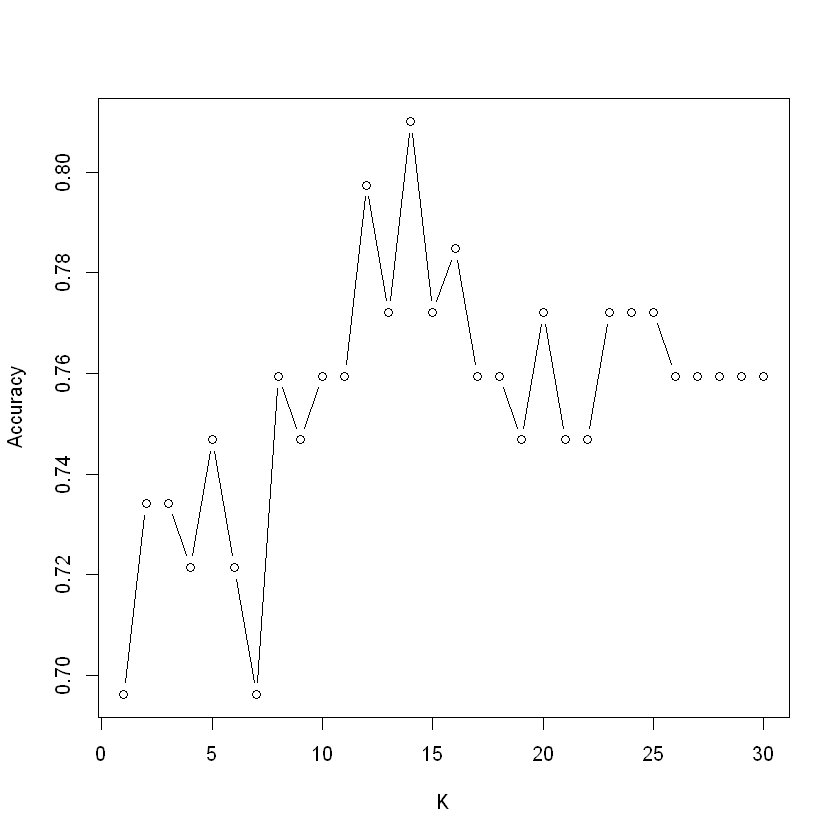

In [19]:
# ML for Classification : KNN Regression
#Prepping data for KNN
#dib9
nor <-function(x) { (x -min(x))/(max(x)-min(x)) }
dib9[,1:7]=sapply(dib9[,1:7], nor)
head(dib9[,1:7])

#split data
#We split the data into a 20% of data being the test set and 80% being the training set
set.seed(100)
training.idx <- sample(1: nrow(dib9), size=nrow(dib9)*0.8)
train.data <-dib9[training.idx, ]
test.data <- dib9[-training.idx, ]
#train.data$diabetes

#KNN Regression code
library(class)
set.seed(101)
knn4<-knn(train.data[,1:7], test.data[,1:7], cl=train.data$diabetes, k=2)
mean(knn4 ==test.data$diabetes)


#try different k to find the best classfier
ac<-rep(0, 30) 
for(i in 1:30){
  set.seed(101)
  knn.i<-knn(train.data[,1:7], test.data[,1:7], cl=train.data$diabetes, k=i)
  ac[i]<-mean(knn.i ==test.data$diabetes)
  cat("k=", i, " accuracy=", ac[i], "\n")
}  
#ac
#Accuracy plot
plot(ac, type="b", xlab="K",ylab="Accuracy")

set.seed(101)
knn5<-knn(train.data[,1:7], test.data[,1:7], cl=train.data$diabetes, k=14)

table(knn5,test.data$diabetes)


prec2=(50/56)
cat("The value of precsion here would be :",prec2)


reca2=(50/59)
cat("The value of recall:",reca2)



### 3.1.3 ML:Classification using SVM

The data is rather imbalanced as well, making SVM a really good method to use when analyzing this data. We can see from earlier that the variables are not linearly related which means SVM can be efficiently performed.


In [20]:
#ML for Classification :Support Vector Machine
install.packages('e1071', dependencies=TRUE)
library(e1071)
svm.l<-svm(diabetes~., data = train.data, kernel = "linear")
summary(svm.l)

#test with train data
pred.svm.l <- predict(svm.l, newdata=test.data[,1:7])
# Check accuracy:
mean(pred.svm.l ==test.data$diabetes) 


table(predict=pred.svm.l, actual=test.data$diabetes)

prec3=(49/56)
cat("The value of precsion here would be :",prec3)

reca3=(49/57)
cat("The value of recall:",reca3)

mean(pred.svm.l ==test.data$diabetes)



  There is a binary version available but the source version is later:
      binary source needs_compilation
e1071  1.7-6 1.7-13              TRUE

  Binaries will be installed
package 'e1071' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'e1071'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Ishuardev\anaconda3\envs\r-tutorial\Lib\R\library\00LOCK\e1071\libs\x64\e1071.dll to C:\Users\Ishuardev\anaconda3\envs\r-tutorial\Lib\R\library\e1071\libs\x64\e1071.dll: Permission denied"Warning message:
"restored 'e1071'"


The downloaded binary packages are in
	C:\Users\Ishuardev\AppData\Local\Temp\RtmpAF705i\downloaded_packages


Warning message:
"package 'e1071' was built under R version 3.6.3"


Call:
svm(formula = diabetes ~ ., data = train.data, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  157

 ( 79 78 )


Number of Classes:  2 

Levels: 
 0 1




[1] 0.8101266

       actual
predict  0  1
      0 15  7
      1  8 49

The value of precsion here would be : 0.875The value of recall: 0.8596491

[1] 0.8101266

## 3.2  ML:Clustering using K-Mean and Hierarchical

I found it a crucial algorithm to use. It uses data points in the dataset that sharessimilar features into clusters so that I could deduce relationships by meaningful interpretation. From this I could pinpoint variables that are truly influential to the contraction of diabetes.

List of 9
 $ cluster     : int [1:392] 1 2 1 2 2 2 2 1 1 2 ...
 $ centers     : num [1:2, 1:7] -0.454 0.695 -0.379 0.579 -0.43 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:7] "glucose" "pressure" "triceps" "insulin" ...
 $ totss       : num 2737
 $ withinss    : num [1:2] 945 1171
 $ tot.withinss: num 2116
 $ betweenss   : num 621
 $ size        : int [1:2] 237 155
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


Cluster,glucose,pressure,triceps,insulin,mass,pedigree,age
1,0.6111412,0.6285033,0.4143773,0.1720137,0.3124640,0.1866689,0.41752137
2,0.4190793,0.5706288,0.5671296,0.1429176,0.4312656,0.2015743,0.10740741
3,0.3550073,0.4788130,0.2512051,0.1088293,0.2014629,0.1683819,0.07505112
4,0.7705536,0.5581395,0.4767442,0.4729987,0.3615352,0.2270405,0.18720930


Cluster,glucose,pressure,triceps,insulin,mass,pedigree,age
1,0.6111412,0.6285033,0.4143773,0.1720137,0.3124640,0.1866689,0.41752137
2,0.4190793,0.5706288,0.5671296,0.1429176,0.4312656,0.2015743,0.10740741
3,0.3550073,0.4788130,0.2512051,0.1088293,0.2014629,0.1683819,0.07505112
4,0.7705536,0.5581395,0.4767442,0.4729987,0.3615352,0.2270405,0.18720930


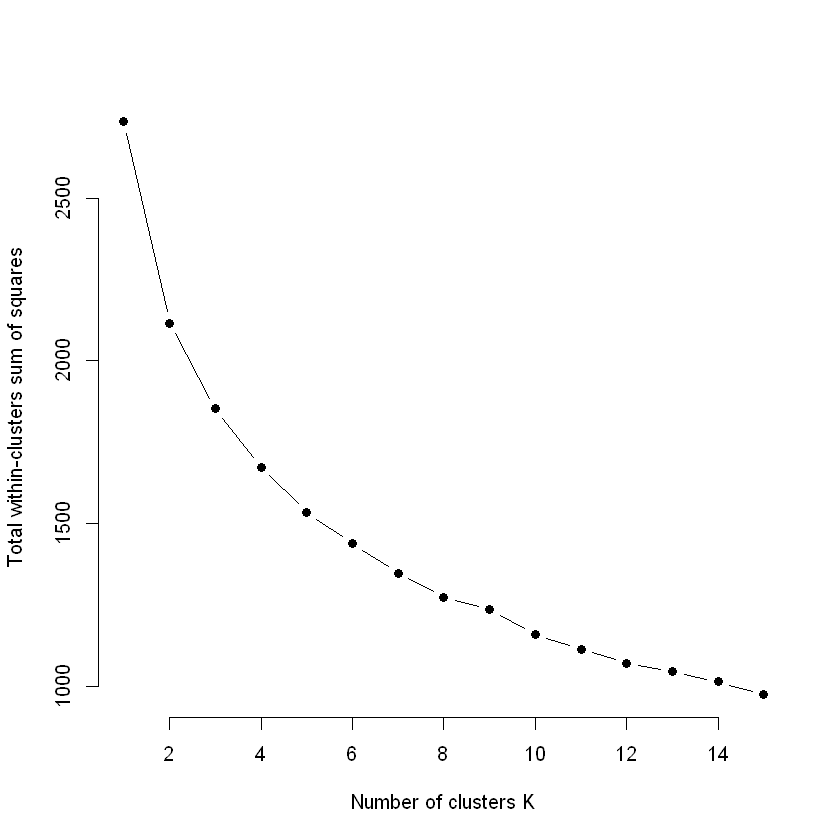

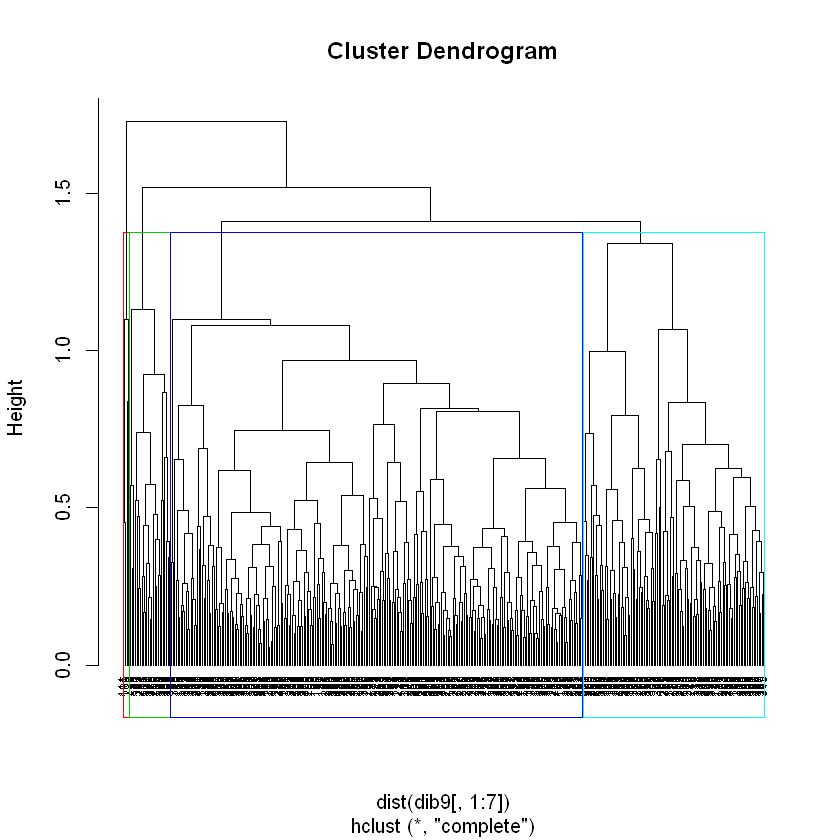

In [33]:
#ML Clustering
#dib9[,1:7]
brr=scale(dib9[,1:7])
#brr
k6= kmeans(brr, center=2, nstart=25)
str(k6)
#k6

fcss <- function(k) {
  kmeans(brr, k, nstart = 10 )$tot.withinss
}
# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15
set.seed(100)
# apply wcss to all k values
fcss_k<-sapply(k.values, fcss)
plot(k.values, fcss_k, type="b", pch = 19, frame = FALSE,
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")
#Elbow point is 4.
set.seed(100)
k45.final <- kmeans(brr, 4, nstart = 25)
#k45.final

library(dplyr)
head(dib9[,1:7] %>% mutate(Cluster = k45.final$cluster) %>% group_by(Cluster) %>% summarise_all("mean"))


head(dib9[,1:7] %>% mutate(Cluster = k45.final$cluster) %>%
  group_by(Cluster) %>% summarise_all("mean"))
#str(dib9[,1:7])
## Hierarchical clustering using Complete Linkage
hc5 <- hclust(dist(dib9[,1:7]), method = "complete" )
# Plot the obtained dendrogram
plot(hc5, cex = 0.6, hang =-.1)
#draw the dendrogram with a border around the 4 clusters. 
#argument border used to specify border colors for the rectangles:
rect.hclust(hc5, k=4, border = 2:5)

#From the 4 clusters what we could deduce is that there is one group where glucose levels are low anf the blood pressure is low
#A group where 

rt=dib9[,1:8] %>% mutate(Cluster = k45.final$cluster) %>% group_by(Cluster)
rtv=summarise(rt,number_of_candidates=n(),)

#cluster 1 has 78 people
#filter(rt,Cluster==1, diabetes==1)
#32 in cluster 1 are non-diabetic
#filter(rt,Cluster==1, diabetes==0)
#46 in cluster 1 are diabetic 

#cluster 4 has 43 people
#filter(rt,Cluster==4, diabetes==1)
#14 in cluster 4 are non-diabetic
#filter(rt,Cluster==4, diabetes==0)
#29 in cluster 4 are diabetic

#cluster 2 has 108 people
#filter(rt,Cluster==2, diabetes==1)
#68 in cluster 2 are non-diabetic
#filter(rt,Cluster==2, diabetes==0)
#40 in cluster 2 are diabetic

#cluster 3 has 163 people
#filter(rt,Cluster==3, diabetes==1)
#148 in cluster 3 are non-diabetic
#filter(rt,Cluster==3, diabetes==0)
#15 in cluster 3 are diabetic

# 3.3 Summary of Results 

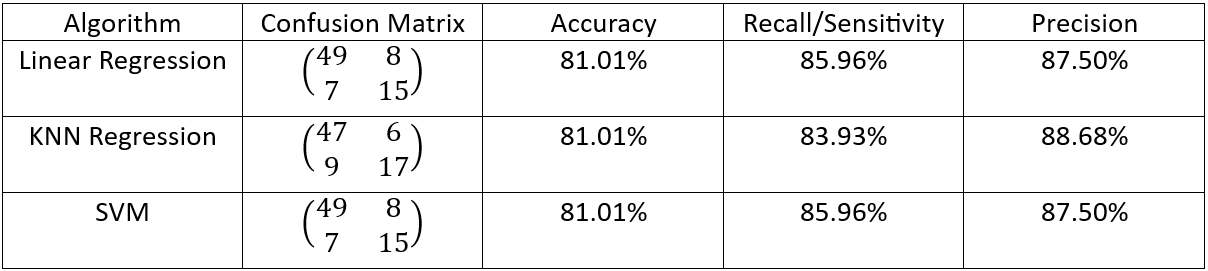

The data was collected and shown in the table above. We can see that though all algorithms have the same accuracy, looking deeper into it and comparing the precision and sensitivity of the algorithm we can deduce that using Linear regression and SVM would be the best algorithms needed to classify the groups and at the same time predict the onset of diabetes. Answering one of the project objectives.

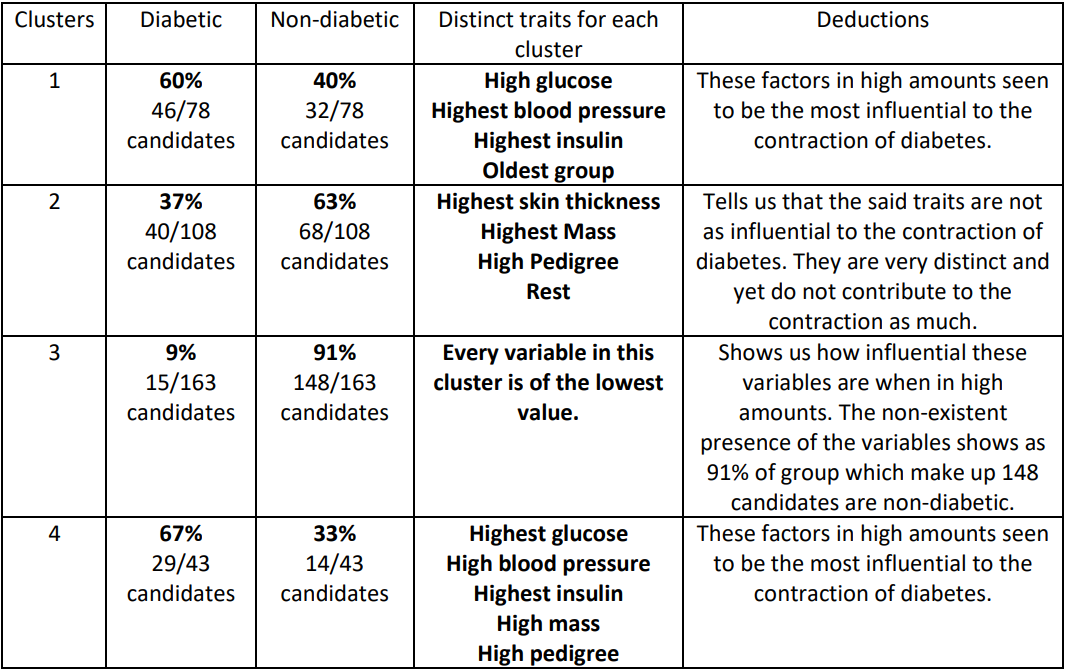

I interpreted that there is substantial evidence to claim that variables ”glucose”,”blood pressure”, ”insulin” and ”age” were the most influential variables. When these variables were of high values in a candidate it was probable they had contracted diabetes. The two groups from the cluster of 4 displayed this relationship namely 1 and 4. Cluster 3 supports this deduction as the parameters had its values being very low and 91 percent of this cluster were found to be non-diabetic.

# 4 Conclusion and Discussion

## 4.1 Summary of findings

I was able to satisfy my objectives and questions, through the course of this project. Finding out that Linear Regression and SVM are the best algorithms in classifying candidates into the two groups based on their variables. Also I was able to distinguish the most influential variables provided in the data set through the usage of clustering and rigorous analysis. Namely they are ”glucose”,”blood pressure”, ”insulin” and ”age”. We also deduced that having very high values in any parameter does contribute to an individual likely being diabetic.


## 4.2 Limitations and suggestions for improvements

I was dealing with a small data set, it would not show the true potential of the algorithms used. Also I was using data from 50 years ago, it would not be as accurate now with new factors that are now scientifically recognized to influence the likeliness of diabetes to be contracted in a person. Which could be taken to account now. We can move forward by using other algorithms that are outside of syllabus to even more accurately predict diabetes. Such as the random forest regression. We can also use more up to date information as variables to increase the accuracy.